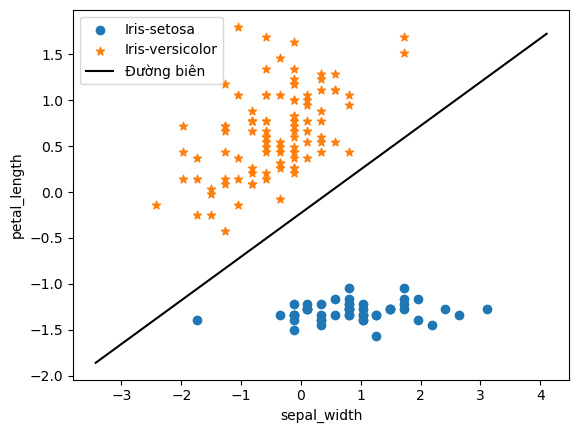

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=500, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def output(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.output(X) >= 0.0, 1, -1)

# Tạo dữ liệu giả định
data = sns.load_dataset('iris')
data = data.sample(frac = 1)

y = data.iloc[0:149, 4].values
y = np.where(y == 'setosa', -1, 1)
X = data.iloc[0:149, [1, 2]].values

# Tiêu chuẩn hóa dữ liệu
sc = StandardScaler()
X = sc.fit_transform(X)

# Tạo một đối tượng Perceptron
perceptron = Perceptron(eta=0.01, n_iter=500, random_state=1)

# Huấn luyện mô hình Perceptron trên dữ liệu
perceptron.fit(X, y)

# Vẽ biểu đồ dữ liệu và đường biên của mô hình
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Iris-setosa', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Iris-versicolor', marker='*')
plt.xlabel('sepal_width')
plt.ylabel('petal_length')

# Vẽ đường biên của mô hình
w = perceptron.w_
x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2 = (-w[0] - w[1] * x1) / w[2]
plt.plot(x1, x2, label='Đường biên', color='black')

plt.legend()
plt.show()


In [33]:
import seaborn as sns
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
